In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import BaggingClassifier, GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.kernel_ridge import KernelRidge
from sklearn.decomposition import PCA
import xgboost as xgb
import lightgbm as lgb
from sklearn import tree

In [2]:
train = pd.read_csv('/Users/sunmingze/Desktop/Airbnb/train-2.csv')
test = pd.read_csv('/Users/sunmingze/Desktop/Airbnb/test.csv')

In [3]:
test.head()

,Id,experiences_offered,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,property_type,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,0,none,within an hour,1.00,f,1.0,f,51.443971,-0.166191,Apartment,...,10.0,10.0,10.0,10.0,10.0,f,moderate,f,f,0.69
1,1,none,within a few hours,0.94,f,62.0,t,51.510348,-0.146679,Apartment,...,8.0,8.0,10.0,10.0,8.0,f,strict_14_with_grace_period,f,f,0.13
2,2,none,within an hour,1.00,f,5.0,f,51.525564,-0.180025,Apartment,...,NaN,NaN,NaN,NaN,NaN,t,moderate,f,f,NaN
3,3,none,within a few hours,0.90,f,1.0,f,51.524180,-0.068227,Apartment,...,8.0,9.0,8.0,10.0,10.0,f,moderate,f,f,0.20
4,4,none,within an hour,1.00,t,150.0,f,51.478699,-0.194385,Apartment,...,10.0,10.0,10.0,10.0,10.0,f,moderate,f,f,0.58


In [4]:
train.drop('Id', axis=1, inplace=True)

In [5]:
test.drop('Id', axis=1, inplace=True)

In [6]:
train['train_data'] = 'Y'

In [7]:
test['train_data'] = 'N'


 mu = 104.00 and sigma = 70.35



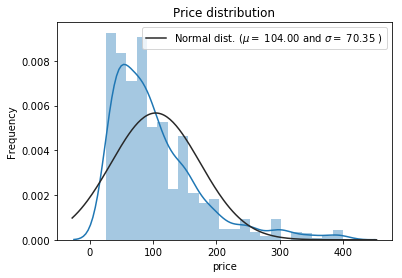

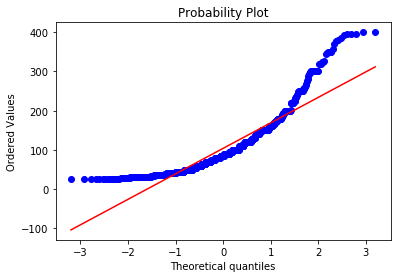

In [8]:
sns.distplot(train['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['price'], plot=plt)
plt.show()


 mu = 4.46 and sigma = 0.62



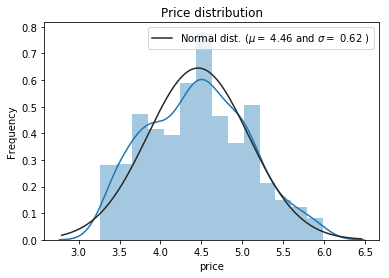

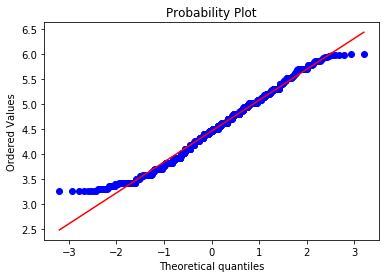

In [9]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["price"] = np.log1p(train["price"])

#Check the new distribution 
sns.distplot(train['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['price'], plot=plt)
plt.show()

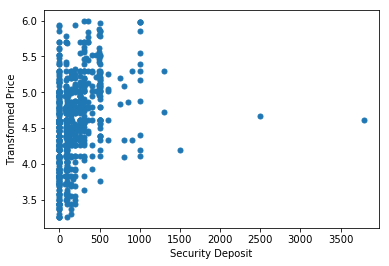

In [10]:
# Outliers
fig, ax = plt.subplots()
ax.scatter(x = train['security_deposit'], y = train['price'], s=25)
plt.xlabel('Security Deposit', fontsize=10)
plt.ylabel('Transformed Price', fontsize=10)
plt.savefig('Outliers.png')

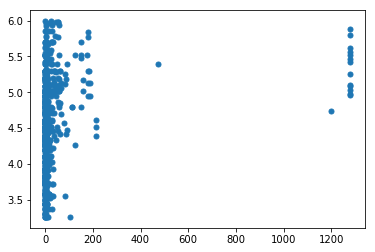

In [11]:
fig, ax = plt.subplots()
ax.scatter(x = train['host_listings_count'], y = train['price'], s=25)

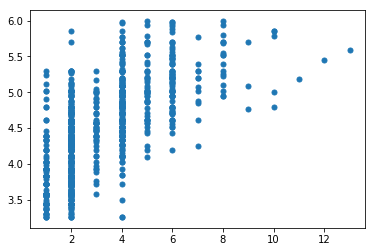

In [12]:
fig, ax = plt.subplots()
ax.scatter(x = train['accommodates'], y = train['price'], s=25)

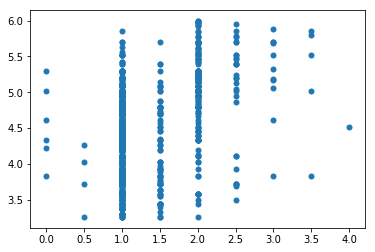

In [13]:
fig, ax = plt.subplots()
ax.scatter(x = train['bathrooms'], y = train['price'], s=25)

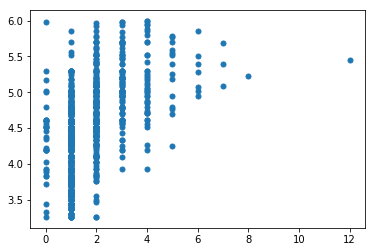

In [14]:
fig, ax = plt.subplots()
ax.scatter(x = train['beds'], y = train['price'], s=25)

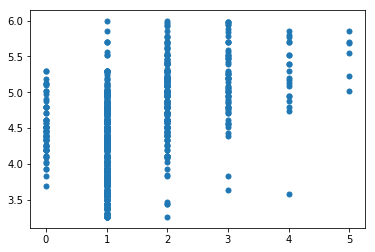

In [15]:
fig, ax = plt.subplots()
ax.scatter(x = train['bedrooms'], y = train['price'], s=25)

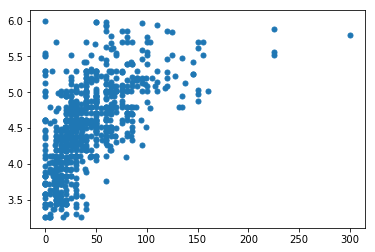

In [16]:
fig, ax = plt.subplots()
ax.scatter(x = train['cleaning_fee'], y = train['price'], s=25)

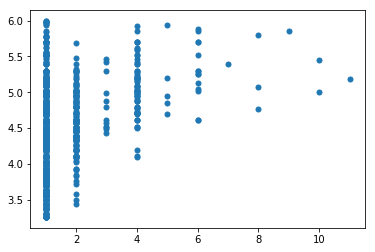

In [17]:
fig, ax = plt.subplots()
ax.scatter(x = train['guests_included'], y = train['price'], s=25)

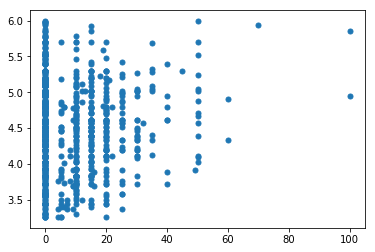

In [18]:
fig, ax = plt.subplots()
ax.scatter(x = train['extra_people'], y = train['price'], s=25)

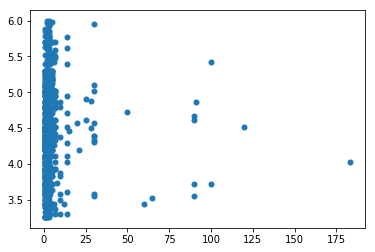

In [19]:
fig, ax = plt.subplots()
ax.scatter(x = train['minimum_nights'], y = train['price'], s=25)

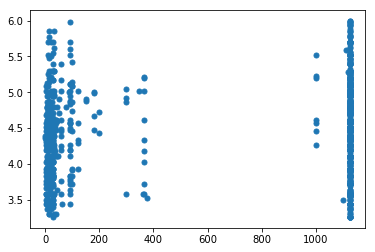

In [20]:
fig, ax = plt.subplots()
ax.scatter(x = train['maximum_nights'], y = train['price'], s=25)

In [21]:
# drop outliers
train = train.drop(train[(train['security_deposit']>2000)].index)

In [22]:
all_data = pd.concat((train, test), sort=True).reset_index(drop=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (1998, 36)


In [23]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]

In [24]:
all_data_na.drop('price', inplace=True)

In [25]:
new_index = ['SD', 'HRT', 'HRR', 'RSV', 'RSL', 'RSC', 'RSC',
            'RSCH', 'RSA', 'RSR', 'RS/M', 'CF', 'Bath', 'Beds', 'BM',
            'HLC', 'HS', 'HIV']

In [26]:
type(all_data_na)

pandas.core.series.Series

In [27]:
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
security_deposit,32.132132
host_response_time,30.880881
host_response_rate,30.880881
review_scores_value,25.925926
review_scores_location,25.875876
review_scores_communication,25.825826
review_scores_cleanliness,25.825826
review_scores_checkin,25.825826
review_scores_accuracy,25.825826
review_scores_rating,25.775776


In [28]:
#missing_data.drop('price', inplace=True)

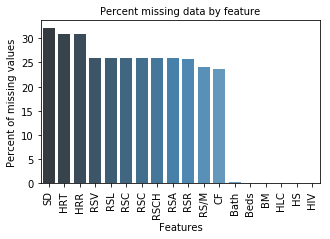

In [29]:
f, ax = plt.subplots(figsize=(5, 3))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na, palette="Blues_d")
ax.set_xticklabels(new_index, rotation='vertical', fontsize=10)
plt.xlabel('Features', fontsize=10)
plt.ylabel('Percent of missing values', fontsize=10)
plt.title('Percent missing data by feature', fontsize=10)
plt.savefig('foo.png')

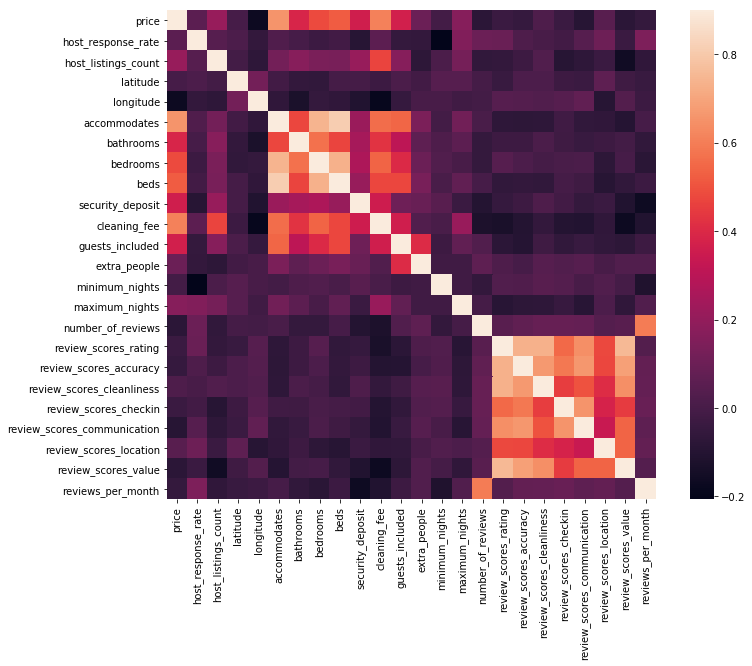

In [30]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [31]:
imputer = SimpleImputer(strategy='most_frequent')
_ = imputer.fit(all_data)
X = imputer.transform(all_data)
all_data1 = pd.DataFrame(X, columns=all_data.columns)

In [32]:
geo = all_data1[['longitude', 'latitude']]
km = KMeans(n_clusters=10, random_state=28).fit(geo)
all_data1['geo'] = km.labels_

In [33]:
all_data1 = all_data1.drop('longitude', axis=1)
all_data1 = all_data1.drop('latitude', axis=1)

In [34]:
all_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 35 columns):
accommodates                        1998 non-null object
bathrooms                           1998 non-null object
bed_type                            1998 non-null object
bedrooms                            1998 non-null object
beds                                1998 non-null object
cancellation_policy                 1998 non-null object
cleaning_fee                        1998 non-null object
experiences_offered                 1998 non-null object
extra_people                        1998 non-null object
guests_included                     1998 non-null object
host_identity_verified              1998 non-null object
host_is_superhost                   1998 non-null object
host_listings_count                 1998 non-null object
host_response_rate                  1998 non-null object
host_response_time                  1998 non-null object
instant_bookable                    19

In [35]:
cat_var = ['experiences_offered', 'host_response_time', 'host_is_superhost', 'host_identity_verified',
          'property_type', 'room_type', 'bed_type', 'instant_bookable', 'cancellation_policy',
          'require_guest_profile_picture', 'require_guest_phone_verification', 'geo']
num_var = ['host_response_rate', 'host_listings_count', 'accommodates',
          'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'guests_included',
          'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating',
          'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
          'review_scores_location', 'review_scores_value', 'reviews_per_month']

In [36]:
#numeric_feats = num_var

# Check the skew of all numerical features
#skewed_feats = all_data1[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
#print("\nSkew in numerical features: \n")
#skewness = pd.DataFrame({'Skew' :skewed_feats})
#skewness.head(10)

In [37]:
all_data2 = pd.get_dummies(all_data1, columns=cat_var, prefix=cat_var)
all_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 84 columns):
accommodates                                       1998 non-null object
bathrooms                                          1998 non-null object
bedrooms                                           1998 non-null object
beds                                               1998 non-null object
cleaning_fee                                       1998 non-null object
extra_people                                       1998 non-null object
guests_included                                    1998 non-null object
host_listings_count                                1998 non-null object
host_response_rate                                 1998 non-null object
maximum_nights                                     1998 non-null object
minimum_nights                                     1998 non-null object
number_of_reviews                                  1998 non-null object
price                        

In [38]:
min_max_scaler = MinMaxScaler()
all_data2[num_var] = min_max_scaler.fit_transform(all_data2[num_var])

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [39]:
#Transform skewed features
skew = abs(all_data2[num_var].skew()).sort_values(ascending = False)
skew_features = skew[skew > 0.75]

In [40]:
print(skew_features)

minimum_nights                 9.930813
host_listings_count            6.943972
security_deposit               6.308535
review_scores_communication    5.115893
review_scores_checkin          4.998740
number_of_reviews              4.842708
host_response_rate             4.662728
review_scores_accuracy         3.807421
cleaning_fee                   3.579965
bathrooms                      3.549010
review_scores_rating           3.077185
review_scores_location         3.057814
review_scores_cleanliness      3.034182
guests_included                3.026225
reviews_per_month              2.825489
review_scores_value            2.596126
extra_people                   2.448609
beds                           2.070349
bedrooms                       1.509477
accommodates                   1.447314
dtype: float64


In [41]:
#all_data2[skew_features] = np.log1p(all_data2[skew_features])

In [42]:
training = all_data2[all_data2['train_data']=='Y']
testing = all_data2[all_data2['train_data']=='N']

In [43]:
testing.drop('train_data', axis=1, inplace=True)
training.drop('train_data', axis=1, inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [44]:
train_set, test_set = train_test_split(training, test_size=0.2, random_state=42)
X_train = train_set.drop('price', axis=1)
y_train = train_set['price'].copy()
X_test = test_set.drop('price', axis=1)
y_test = test_set['price'].copy()

In [45]:
# Use Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
lin_mse = mean_squared_error(y_train, lin_reg.predict(X_train))
print(np.sqrt(lin_mse))

0.3390079184048541


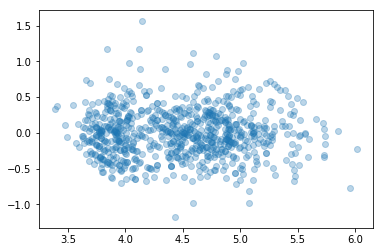

In [47]:
residuals = y_train - lin_reg.predict(X_train)
plt.scatter(x=lin_reg.predict(X_train), y=residuals, alpha=0.3)

In [48]:
def residual_plot(model, X_train, y_train, X_test, y_test):
    residuals = y_train - model.predict(X_train)
    residuals2 = y_test - model.predict(X_test)
    plt.scatter(x=model.predict(X_train), y=residuals, alpha=0.5)
    plt.scatter(x=model.predict(X_test), y=residuals2, color='green', alpha=0.3)

In [49]:
# model: lasso regression
lasso =Lasso(alpha=0.3)
lasso.fit(X_train, y_train) 

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [50]:
lasso_mse = mean_squared_error(y_train, lasso.predict(X_train))
print(np.sqrt(lasso_mse))

0.6225958278432521


In [51]:
# model: ridge regression
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [52]:
ridge_mse = mean_squared_error(y_train, ridge.predict(X_train))
print(np.sqrt(ridge_mse))

0.34218321543033037


In [118]:
alphas = np.linspace(0.1, 1, 25, endpoint=True)
train_results_r = []
test_results_r = []
for alpha in alphas:
    ri = Ridge(alpha=alpha)
    ri.fit(X_train, y_train)
    train_mse_r = mean_squared_error(y_train, ri.predict(X_train))
    test_mse_r = mean_squared_error(y_test, ri.predict(X_test))
    train_results_r.append(train_mse_r)
    test_results_r.append(test_mse_r)

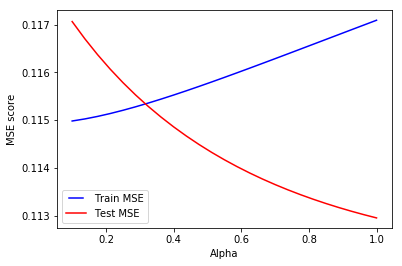

In [125]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(alphas, train_results_r, 'b', label='Train MSE')
line2, = plt.plot(alphas, test_results_r, 'r', label='Test MSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MSE score')
plt.xlabel('Alpha')

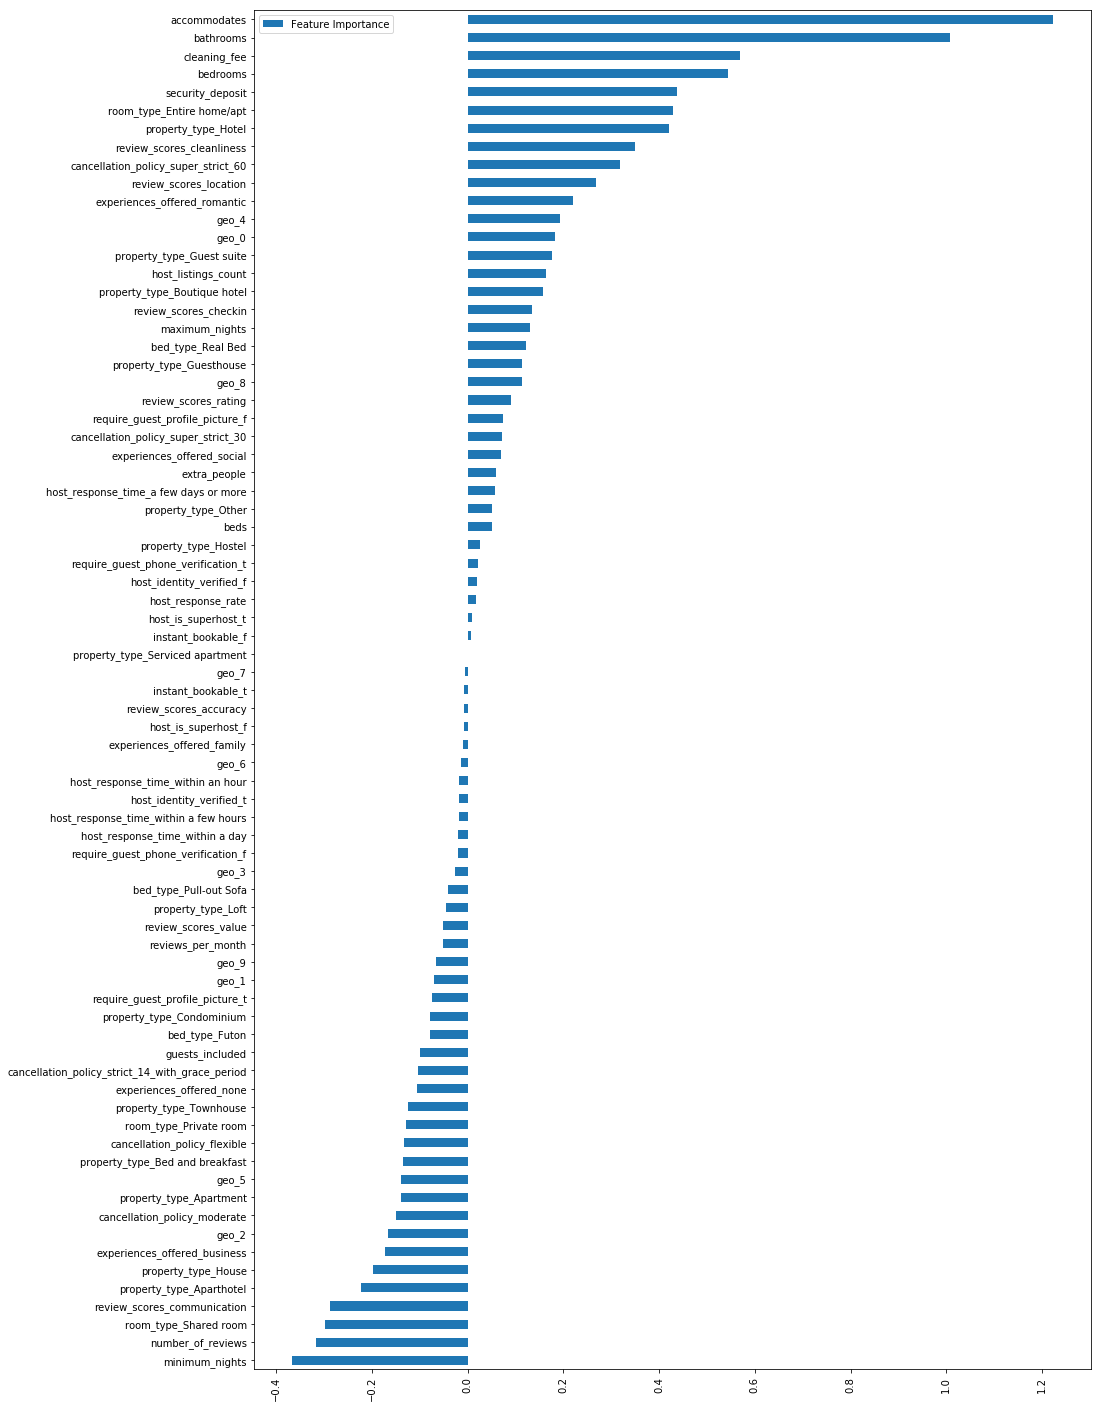

In [53]:
FI_ridge = pd.DataFrame({"Feature Importance":ridge.coef_}, index=X_train.columns)
FI_ridge[FI_ridge["Feature Importance"]!=0].sort_values("Feature Importance").plot(kind="barh",figsize=(15,25))
plt.xticks(rotation=90)
plt.show()

In [54]:
# model: elastic net
elastic_net = ElasticNet(alpha=0.001,l1_ratio=0.1)
elastic_net.fit(X_train, y_train)

ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.1,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [55]:
elasticN_mse = mean_squared_error(y_train, elastic_net.predict(X_train))
print(np.sqrt(elasticN_mse))

0.3416828864074292


In [56]:
# kernel ridge
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
KRR.fit(X_train, y_train)

KernelRidge(alpha=0.6, coef0=2.5, degree=2, gamma=None, kernel='polynomial',
      kernel_params=None)

In [57]:
KRR_mse = mean_squared_error(y_train, KRR.predict(X_train))
print(np.sqrt(KRR_mse))

0.36003072791146334


In [58]:
# Gradient Boosting Regression
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
GBoost.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=4,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             n_iter_no_change=None, presort='auto', random_state=5,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [59]:
GBoost_mse = mean_squared_error(y_train, GBoost.predict(X_train))
print(np.sqrt(GBoost_mse))

0.14457379100947415


In [60]:
# XGBoost
XGBoost = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
XGBoost.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05,
       max_delta_step=0, max_depth=3, min_child_weight=1.7817,
       missing=None, n_estimators=2200, n_jobs=1, nthread=-1,
       objective='reg:linear', random_state=7, reg_alpha=0.464,
       reg_lambda=0.8571, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.5213)

In [61]:
XGBoost_mse = mean_squared_error(y_train, XGBoost.predict(X_train))
print(np.sqrt(XGBoost_mse))

0.15529926896048687


In [62]:
# LightGBM
lgb1 = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                        learning_rate=0.05, n_estimators=720,
                        max_bin = 55, bagging_fraction = 0.8,
                        bagging_freq = 5, feature_fraction = 0.2319,
                        feature_fraction_seed=9, bagging_seed=9,
                        min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
lgb1.fit(X_train, y_train)

LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
       boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       feature_fraction=0.2319, feature_fraction_seed=9,
       importance_type='split', learning_rate=0.05, max_bin=55,
       max_depth=-1, min_child_samples=20, min_child_weight=0.001,
       min_data_in_leaf=6, min_split_gain=0.0, min_sum_hessian_in_leaf=11,
       n_estimators=720, n_jobs=-1, num_leaves=5, objective='regression',
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [63]:
lgb_mse = mean_squared_error(y_train, lgb1.predict(X_train))
print(np.sqrt(lgb_mse))

0.2441397843384976


In [150]:
# Desicion Tree
clf = tree.DecisionTreeRegressor(max_depth=5)
clf.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [151]:
clf_mse = mean_squared_error(y_train, clf.predict(X_train))
print(np.sqrt(clf_mse))

0.32979774459086253


In [152]:
clf_mse_test = mean_squared_error(y_test, clf.predict(X_test))
print(clf_mse_test)

0.15343842266298396


In [127]:
# max_depths
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = tree.DecisionTreeRegressor(max_depth=max_depth)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    train_mse = mean_squared_error(y_train, dt.predict(X_train))
    test_mse = mean_squared_error(y_test, dt.predict(X_test))
    train_results.append(train_mse)
    test_results.append(test_mse)

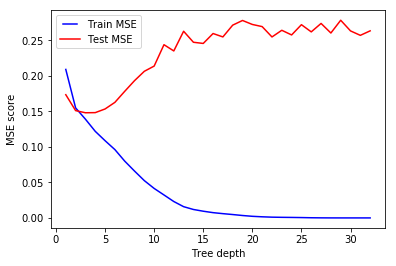

In [128]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train MSE')
line2, = plt.plot(max_depths, test_results, 'r', label='Test MSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MSE score')
plt.xlabel('Tree depth')
plt.show()

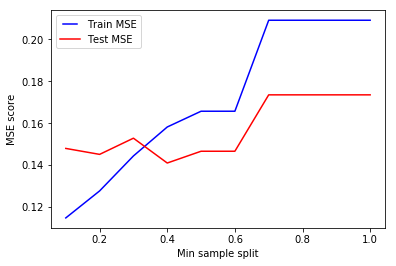

In [135]:
# min_sample_split
min_sample_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_sample_split in min_sample_splits:
    dt = tree.DecisionTreeRegressor(min_samples_split=min_sample_split)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    train_mse = mean_squared_error(y_train, dt.predict(X_train))
    test_mse = mean_squared_error(y_test, dt.predict(X_test))
    train_results.append(train_mse)
    test_results.append(test_mse)

line1, = plt.plot(min_sample_splits, train_results, 'b', label='Train MSE')
line2, = plt.plot(min_sample_splits, test_results, 'r', label='Test MSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MSE score')
plt.xlabel('Min sample split')
plt.show()

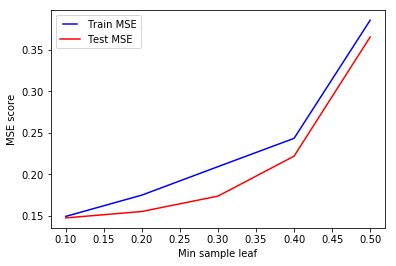

In [140]:
# min_sample_leaf
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dt = tree.DecisionTreeRegressor(min_samples_leaf=min_samples_leaf)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    train_mse = mean_squared_error(y_train, dt.predict(X_train))
    test_mse = mean_squared_error(y_test, dt.predict(X_test))
    train_results.append(train_mse)
    test_results.append(test_mse)

line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train MSE')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test MSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MSE score')
plt.xlabel('Min sample leaf')
plt.show()

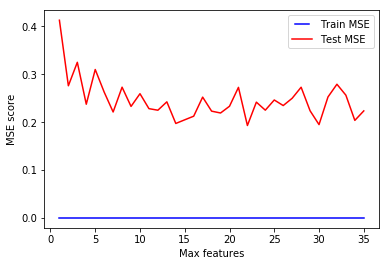

In [141]:
# max_features
max_features = list(range(1,train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    dt = tree.DecisionTreeRegressor(max_features=max_feature)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    train_mse = mean_squared_error(y_train, dt.predict(X_train))
    test_mse = mean_squared_error(y_test, dt.predict(X_test))
    train_results.append(train_mse)
    test_results.append(test_mse)

line1, = plt.plot(max_features, train_results, 'b', label='Train MSE')
line2, = plt.plot(max_features, test_results, 'r', label='Test MSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MSE score')
plt.xlabel('Max features')
plt.savefig('max_features')
plt.show()

In [94]:
# Random Forest
randf = RandomForestRegressor(max_depth=8)
randf.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [95]:
randf_mse = mean_squared_error(y_train, randf.predict(X_train))
print(np.sqrt(randf_mse))

0.24881305520493735


In [96]:
randf_mse_test = mean_squared_error(y_test, randf.predict(X_test))
print(randf_mse_test)

0.12364400040836078


In [163]:
names = list(X_train.columns)
print("Features sorted by their score:")
print(pd.DataFrame(sorted(zip(map(lambda x: round(x, 4), randf.feature_importances_), names), 
             reverse=True)))

Features sorted by their score:
         0                                                1
0   0.5418                        room_type_Entire home/apt
1   0.1383                                        bathrooms
2   0.0613                                     accommodates
3   0.0346                              host_listings_count
4   0.0332                                     cleaning_fee
5   0.0216                                number_of_reviews
6   0.0172                                reviews_per_month
7   0.0140                                   minimum_nights
8   0.0128                                     extra_people
9   0.0127                                 security_deposit
10  0.0105                                   maximum_nights
11  0.0090                                             beds
12  0.0085                               host_response_rate
13  0.0075                        review_scores_cleanliness
14  0.0070                                            geo_4
15  0.00

In [65]:
def marksOfTrain(X_train, y_train, method):
    print('This is used for measuring training performance:')
    for ref in method:
        ref.fit(X_train, y_train)
        y_pred = ref.predict(X_train)
        print(ref.__class__.__name__, np.sqrt(mean_squared_error(y_train, y_pred)))

In [66]:
def marksOfTest(X_train, y_train, y_test, method):
    print('This is used for measuring test performance:')
    for ref in method:
        ref.fit(X_train, y_train)
        y_pred = ref.predict(X_test)
        print(ref.__class__.__name__, np.sqrt(mean_squared_error(y_test, y_pred)))

In [80]:
method = [lin_reg, lasso, ridge, elastic_net, KRR, GBoost, XGBoost, lgb1]
marksOfTrain(X_train, y_train, method)

This is used for measuring training performance:
LinearRegression 0.3390079184048541
Lasso 0.6225958278432521
Ridge 0.34218321543033037
ElasticNet 0.3416828864074292
KernelRidge 0.36003072791146334
GradientBoostingRegressor 0.14457379100947415
XGBRegressor 0.15529926896048687
LGBMRegressor 0.2441397843384976


In [81]:
marksOfTest(X_train, y_train, y_test, method)

This is used for measuring test performance:
LinearRegression 12095060357.997023
Lasso 0.6048010591564522
Ridge 0.33608443274103766
ElasticNet 0.3363304115426922
KernelRidge 0.34081277706046315
GradientBoostingRegressor 0.3411579904404259
XGBRegressor 0.3423657460631856
LGBMRegressor 0.3277158923079558


In [91]:
testing.drop('price', axis=1, inplace=True)
sub_Id = list(range(1000))
sub_lgprice = ridge.predict(testing)
sub_price = np.expm1(sub_lgprice)
d = {'Id': sub_Id, 'price': sub_price}
submission = pd.DataFrame(d)
submission.to_csv('submission_ridge.csv',index=False)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [ ]:
sub_Id = list(range(1000))
sub_lgprice = lgb1.predict(testing)
sub_price = np.expm1(sub_lgprice)
d = {'Id': sub_Id, 'price': sub_price}
submission = pd.DataFrame(d)
submission.to_csv('submission_lgb.csv',index=False)

In [ ]:
sub_Id = list(range(1000))
sub_lgprice = stack.predict(testing.values)
sub_price = np.expm1(sub_lgprice)
d = {'Id': sub_Id, 'price': sub_price}
submission = pd.DataFrame(d)
submission.to_csv('submission_stack.csv',index=False)

In [97]:
sub_Id = list(range(1000))
sub_lgprice = randf.predict(testing.values)
sub_price = np.expm1(sub_lgprice)
d = {'Id': sub_Id, 'price': sub_price}
submission = pd.DataFrame(d)
submission.to_csv('submission_RandomForest.csv',index=False)

In [93]:
sub_Id = list(range(1000))
sub_lgprice = clf.predict(testing.values)
sub_price = np.expm1(sub_lgprice)
d = {'Id': sub_Id, 'price': sub_price}
submission = pd.DataFrame(d)
submission.to_csv('submission_ClassificationTree.csv',index=False)

## Hypothesis Test Here

In [153]:
# models for now: elastic_net, KRR, GBoost, XGBoost, lgb1
lasso_p = lasso.predict(X_test)
ridge_p = ridge.predict(X_test)
elastic_net_p = elastic_net.predict(X_test)
KRR_p = KRR.predict(X_test)
GBoost_p = GBoost.predict(X_test)
XGBoost_p = XGBoost.predict(X_test)
lgb1_p = lgb1.predict(X_test)
randf_p = randf.predict(X_test)
clf_p = clf.predict(X_test)

In [154]:
stats.ttest_rel(randf_p, y_test)

Ttest_relResult(statistic=-0.04674740125313725, pvalue=0.9627614303804743)

In [155]:
stats.ttest_rel(clf_p, y_test)

Ttest_relResult(statistic=0.06235006459378179, pvalue=0.9503466393451613)

In [88]:
# compare lasso's prediction and true value
stats.ttest_rel(lasso_p, ridge_p)

Ttest_relResult(statistic=0.7687024786206129, pvalue=0.4429812717080813)

In [89]:
stats.ttest_rel(lasso_p, y_test)

Ttest_relResult(statistic=1.2237482846329313, pvalue=0.2224941593729914)

In [90]:
stats.ttest_rel(ridge_p, y_test)

Ttest_relResult(statistic=1.0532034687639236, pvalue=0.2935248726125995)

In [91]:
stats.ttest_rel(elastic_net_p, y_test)

Ttest_relResult(statistic=1.0311698767054034, pvalue=0.30371277612183445)

In [92]:
stats.ttest_rel(KRR_p, y_test)

Ttest_relResult(statistic=1.3557149534646147, pvalue=0.17672640962799005)

In [93]:
stats.ttest_rel(GBoost_p, y_test)

Ttest_relResult(statistic=-0.3314800926012771, pvalue=0.7406306954048595)

In [94]:
stats.ttest_rel(XGBoost_p, y_test)

Ttest_relResult(statistic=0.018429971353083014, pvalue=0.9853143078780313)

In [95]:
stats.ttest_rel(lgb1_p, y_test)

Ttest_relResult(statistic=0.2412746936449066, pvalue=0.8095906420443684)

In [156]:
lin_reg_t = lin_reg.predict(X_train)
lasso_t = lasso.predict(X_train)
ridge_t = ridge.predict(X_train)
elastic_net_t = elastic_net.predict(X_train)
KRR_t = KRR.predict(X_train)
GBoost_t = GBoost.predict(X_train)
XGBoost_t = XGBoost.predict(X_train)
lgb1_t = lgb1.predict(X_train)
randf_t = randf.predict(X_train)
clf_t = clf.predict(X_train)

In [97]:
stats.ttest_rel(lin_reg_t, y_train)

Ttest_relResult(statistic=-0.01742175743188837, pvalue=0.9861045121177854)

In [157]:
stats.ttest_rel(randf_t, y_train)

Ttest_relResult(statistic=-0.37140787589416246, pvalue=0.7104324708183377)

In [158]:
stats.ttest_rel(clf_t, y_train)

Ttest_relResult(statistic=-3.663322462996842e-14, pvalue=0.9999999999999708)

In [98]:
stats.ttest_rel(lasso_t, y_train)

Ttest_relResult(statistic=1.2415247657031338e-14, pvalue=0.9999999999999901)

In [99]:
stats.ttest_rel(ridge_t, y_train)

Ttest_relResult(statistic=4.499495928898914e-15, pvalue=0.9999999999999964)

In [100]:
stats.ttest_rel(elastic_net_t, y_train)

Ttest_relResult(statistic=1.4070019190330705e-14, pvalue=0.9999999999999888)

In [101]:
stats.ttest_rel(KRR_t, y_train)

Ttest_relResult(statistic=-0.03334244509137356, pvalue=0.9734098544585157)

In [102]:
stats.ttest_rel(GBoost_t, y_train)

Ttest_relResult(statistic=-1.598174196113274, pvalue=0.11040056634062015)

In [103]:
stats.ttest_rel(XGBoost_t, y_train)

Ttest_relResult(statistic=-0.0972843482163797, pvalue=0.9225250439673767)

In [104]:
stats.ttest_rel(lgb1_t, y_train)

Ttest_relResult(statistic=-0.09313268139923782, pvalue=0.9258215600008065)

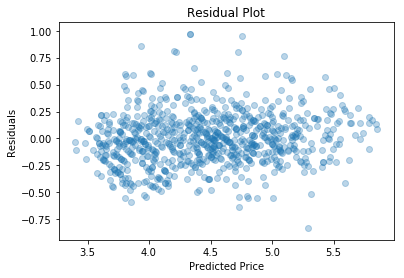

In [111]:
residuals2 = y_train - lgb1.predict(X_train)
plt.scatter(x=lgb1.predict(X_train), y=residuals2, alpha=0.3)
plt.title('Residual Plot')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.savefig('ResidualPlot.png')

Plotting feature importances...


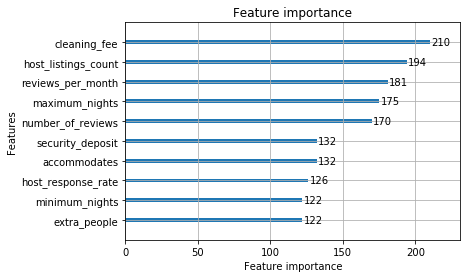

<Figure size 432x288 with 0 Axes>

In [110]:
print('Plotting feature importances...')
ax = lgb.plot_importance(lgb1, max_num_features=10)
plt.show()
plt.savefig('Feature_Importance.png')